In [4]:
# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA




In [6]:
# Step 2: Load the Dataset
iris = sns.load_dataset('iris')  # built-in seaborn dataset
print(iris.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [8]:
# Step 3: Preprocess the Data (Scaling)
features = iris.drop('species', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

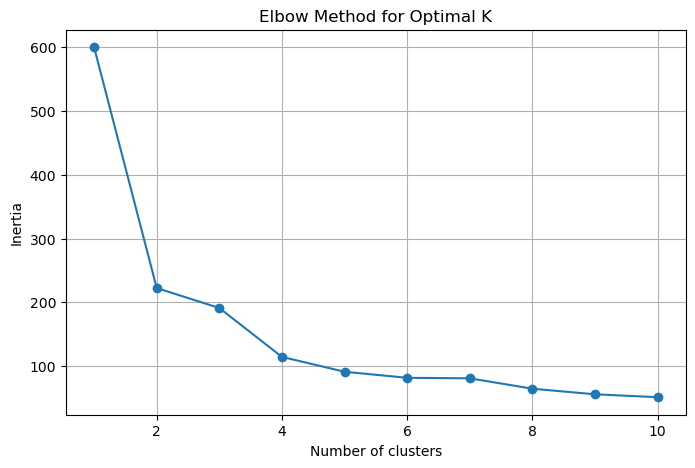

In [10]:
# Step 4: Use the Elbow Method to find optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [12]:
# Step 5: Apply K-Means with optimal K (assume K=3 for Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
iris['cluster'] = kmeans.fit_predict(scaled_features)



C:\Users\shivam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


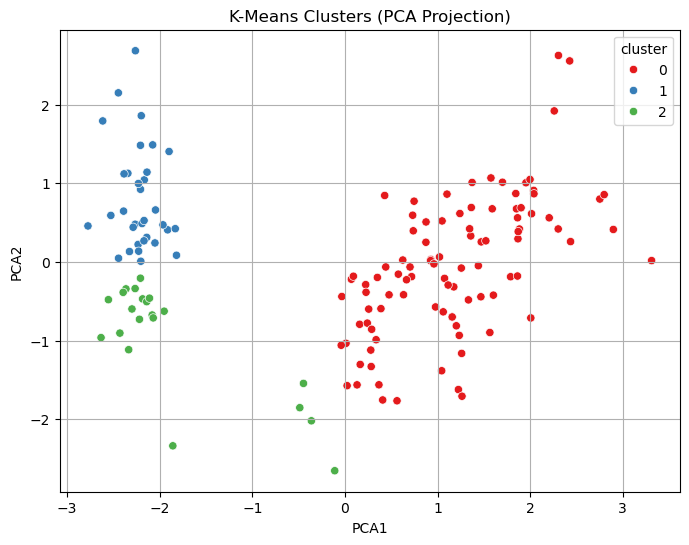

In [14]:
# Step 6: Visualize clusters using 2D scatter plot (PCA for 2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
iris['PCA1'] = pca_components[:, 0]
iris['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title('K-Means Clusters (PCA Projection)')
plt.grid(True)
plt.show()



In [16]:
# Step 7: Interpret the Clustering Results
print(iris.groupby(['cluster', 'species']).size())

cluster  species   
0        versicolor    46
         virginica     50
1        setosa        33
2        setosa        17
         versicolor     4
dtype: int64
